## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# 📂 STEP 2: Mount Drive and Set Paths
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


train_path = '/content/drive/MyDrive/datasetnew/train'
valid_path = '/content/drive/MyDrive/datasetnew/val'


In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/datasetnew/train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,724,402 (86.69 MB)

 Trainable params: 921,618 (3.52 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasetnew/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2514 images belonging to 18 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasetnew/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2514 images belonging to 18 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/79 ━━━━━━━━━━━━━━━━━━━━ 5:35 8s/step - accuracy: 0.1388 - loss: 13.3042

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt

In [2]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: name 'r' is not defined

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.8109645e-01, 1.8903527e-02, 3.2149321e-13, 3.6633790e-15],
       [0.0000000e+00, 1.0000000e+00, 6.7508175e-31, 9.6766906e-34],
       [1.0000000e+00, 0.0000000e+00, 5.1786687e-12, 4.6748233e-21],
       [5.8609026e-21, 3.5736174e-38, 1.0000000e+00, 6.6462439e-35],
       [7.0799731e-33, 1.0000000e+00, 2.7118872e-18, 1.2365503e-16],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.6401240e-34],
       [7.8406102e-38, 1.5452786e-03, 0.0000000e+00, 9.9845469e-01],
       [1.1753855e-34, 6.4181074e-30, 2.3469242e-26, 1.0000000e+00],
       [1.6965836e-25, 7.5243352e-23, 1.0000000e+00, 1.5732070e-17],
       [2.4483354e-23, 9.3621990e-09, 2.4969464e-17, 1.0000000e+00],
       [2.9495364e-14, 9.7012167e-14, 1.4914777e-04, 9.9985087e-01],
       [1.0000000e+00, 2.5258806e-23, 2.3514068e-17, 3.6277342e-38],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.6495063e-24, 9.0913505e-33, 1.0000000e+00, 1.4732772e-30],
       [7.5178525e-30, 3.0929136e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 0, 2, 1, 1, 3, 3, 2, 3, 3, 0, 1, 2, 2, 3, 2, 1], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [19]:
# STEP 1: Install and Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# STEP 2: Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# STEP 3: Load the Saved Model (.h5 file path)
model_path = '/content/drive/MyDrive/model_inception.h5'  # Update with your actual path
model = load_model(model_path)


In [21]:
# STEP 4: Load Validation Data (for evaluation)

IMAGE_SIZE = (224, 224)

val_path = '/content/drive/MyDrive/datasetnew/val'  # Update path if needed

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    val_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 346 images belonging to 18 classes.


In [22]:
# STEP 5: Predict and Prepare Labels

Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_set.classes
class_names = list(test_set.class_indices.keys())


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 94s 8s/step


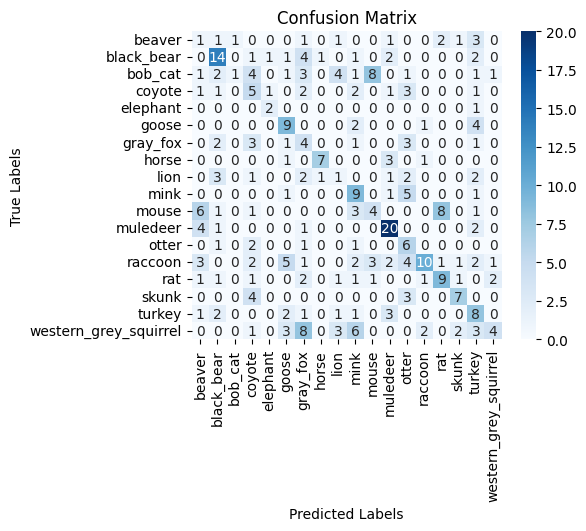

In [33]:
# STEP 6: Confusion Matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [25]:
# STEP 7: Classification Report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
                       precision    recall  f1-score   support

               beaver       0.06      0.08      0.07        12
           black_bear       0.48      0.52      0.50        27
              bob_cat       0.50      0.04      0.07        28
               coyote       0.20      0.29      0.24        17
             elephant       0.50      0.67      0.57         3
                goose       0.38      0.56      0.45        16
             gray_fox       0.13      0.27      0.18        15
                horse       0.78      0.58      0.67        12
                 lion       0.09      0.08      0.08        13
                 mink       0.30      0.53      0.38        17
                mouse       0.25      0.17      0.20        24
             muledeer       0.59      0.71      0.65        28
                otter       0.22      0.55      0.32        11
              raccoon       0.67      0.27      0.38        37
                  rat       0.4

In [26]:
# STEP 8: Accuracy

accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")



Validation Accuracy: 0.35


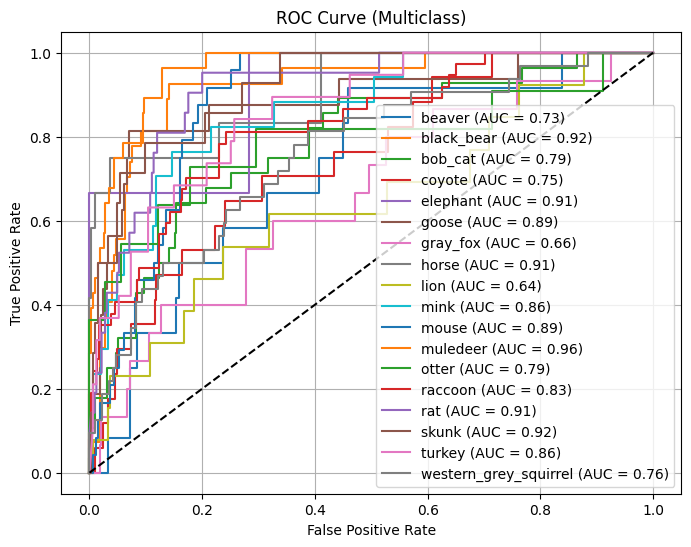

In [28]:
# STEP 9: ROC Curves (Multiclass)

y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


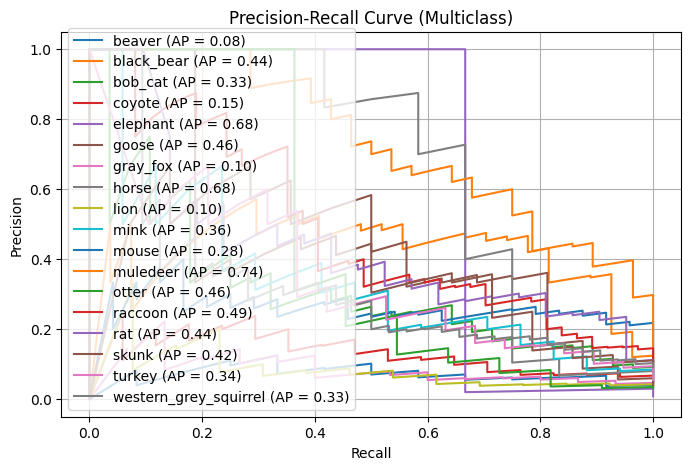

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize labels for PR curve (multi-class)
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

plt.figure(figsize=(8, 5))

for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], Y_pred[:, i])
    ap = average_precision_score(y_true_bin[:, i], Y_pred[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
